# This notebook show the preparation of the data for the machine learning prediction 

The objective here is to obtain a data representing the full grand Prix week end, for every drivers.
Now we have those informations in the data depending on the session name. 
In  our case we need to have them in the same row.

### Import the data and the tools

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv(r'..\Data\allData.csv')

## Checking the data

In [3]:
data.shape

(6625, 25)

In [4]:
data.columns

Index(['number', 'position', 'Q1', 'Q2', 'Q3', 'positionText', 'points',
       'grid', 'laps', 'status', 'year', 'gpName', 'gpNumber', 'sessionName',
       'driverId', 'code', 'DriverNationality', 'constructorId',
       'constructorNationality', 'fastestLapNumber', 'fastestLapRank',
       'fastestLapAvgSpeed', 'fastestLapTime', 'totalTime', 'TimeInterval'],
      dtype='object')

In [5]:
data.describe()

,number,position,points,grid,laps,year,gpNumber,fastestLapNumber,fastestLapRank,fastestLapAvgSpeed,totalTime
count,6625.000000,6605.000000,1599.000000,1599.000000,1599.000000,6625.000000,6625.000000,4915.000000,4915.000000,1526.000000,7.840000e+02
mean,28.059925,10.479485,5.065979,10.151345,54.482802,2019.506113,10.544906,23.241506,10.382299,210.311455,5.668426e+06
std,25.708990,5.756997,7.217079,5.819209,17.902728,1.147093,5.960681,18.519107,5.711499,19.500750,1.275282e+06
min,2.000000,1.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,2.000000,1.000000,140.802000,2.070710e+05
25%,8.000000,5.000000,0.000000,5.000000,52.000000,2018.000000,5.000000,10.000000,5.000000,200.244500,5.280748e+06
50%,18.000000,10.000000,1.000000,10.000000,56.000000,2019.000000,10.000000,14.000000,10.000000,209.825500,5.591682e+06
75%,44.000000,15.000000,8.000000,15.000000,67.000000,2021.000000,16.000000,36.000000,15.000000,224.209000,5.884478e+06
max,99.000000,20.000000,27.000000,20.000000,87.000000,2021.000000,22.000000,85.000000,20.000000,255.014000,1.081032e+07


## Spliting the data into the practice, the race and qualifying 

 The goal of this step is to be able to merge the data to obtain a good data structure for processing

In [6]:
df_race = data[data['sessionName'] == 'Race']

In [7]:
df_practice1 = data[data['sessionName'] == 'Practice 1'][['fastestLapRank','fastestLapTime','year','gpName','driverId']]

In [8]:
df_practice2 = data[data['sessionName'] == 'Practice 2'][['fastestLapRank','fastestLapTime','year','gpName','driverId']]

In [9]:
df_practice3 = data[data['sessionName'] == 'Practice 3'][['fastestLapRank','fastestLapTime','year','gpName','driverId']]

In [10]:
df_practice1 = df_practice1.rename(columns={"fastestLapRank": "fastestLapRankP1","fastestLapTime": "fastestLapTimeP1"})
df_practice2 = df_practice2.rename(columns={"fastestLapRank": "fastestLapRankP2","fastestLapTime": "fastestLapTimeP2"})
df_practice3 = df_practice3.rename(columns={"fastestLapRank": "fastestLapRankP3","fastestLapTime": "fastestLapTimeP3"})

In [11]:
df_quali = data[data['sessionName'] == 'Qualifying'][['Q1','Q2','Q3','year','gpName','driverId']]

#### Data manipulation on race and qualifying to merge them 

In [12]:
df_race.isna().sum()

number                       0
position                    20
Q1                        1619
Q2                        1619
Q3                        1619
positionText                20
points                      20
grid                        20
laps                        20
status                      20
year                         0
gpName                       0
gpNumber                     0
sessionName                  0
driverId                    20
code                         0
DriverNationality           20
constructorId               20
constructorNationality      20
fastestLapNumber            93
fastestLapRank              93
fastestLapAvgSpeed          93
fastestLapTime              93
totalTime                  835
TimeInterval               835
dtype: int64

In [13]:
df_race = df_race.drop(['Q1','Q2','Q3'], axis=1)

In [14]:
df_race['totalTime'].describe()

count    7.840000e+02
mean     5.668426e+06
std      1.275282e+06
min      2.070710e+05
25%      5.280748e+06
50%      5.591682e+06
75%      5.884478e+06
max      1.081032e+07
Name: totalTime, dtype: float64

In [15]:
df_race['totalTime'] = df_race['totalTime'].fillna(df_race['totalTime'].max())

In [16]:
df_race.isna().sum()

number                      0
position                   20
positionText               20
points                     20
grid                       20
laps                       20
status                     20
year                        0
gpName                      0
gpNumber                    0
sessionName                 0
driverId                   20
code                        0
DriverNationality          20
constructorId              20
constructorNationality     20
fastestLapNumber           93
fastestLapRank             93
fastestLapAvgSpeed         93
fastestLapTime             93
totalTime                   0
TimeInterval              835
dtype: int64

first step of our data creation, the race is combined to the qualifying for each drivers 

In [17]:
race_quali = pd.merge(df_race, df_quali, how="left", on=['year','gpName','driverId'])

In [18]:
race_quali.shape 

(1619, 25)

In [19]:
race_quali.columns

Index(['number', 'position', 'positionText', 'points', 'grid', 'laps',
       'status', 'year', 'gpName', 'gpNumber', 'sessionName', 'driverId',
       'code', 'DriverNationality', 'constructorId', 'constructorNationality',
       'fastestLapNumber', 'fastestLapRank', 'fastestLapAvgSpeed',
       'fastestLapTime', 'totalTime', 'TimeInterval', 'Q1', 'Q2', 'Q3'],
      dtype='object')

Second step is to combined the practices data with 

In [20]:
race_quali_1 = pd.merge(race_quali, df_practice1, how="left", on=['year','gpName','driverId'])

In [21]:
race_quali_12 = pd.merge(race_quali_1, df_practice2, how="left", on=['year','gpName','driverId'])

In [22]:
data_complete = pd.merge(race_quali_12, df_practice3, how="left", on=['year','gpName','driverId'])

In [23]:
data_complete.columns

Index(['number', 'position', 'positionText', 'points', 'grid', 'laps',
       'status', 'year', 'gpName', 'gpNumber', 'sessionName', 'driverId',
       'code', 'DriverNationality', 'constructorId', 'constructorNationality',
       'fastestLapNumber', 'fastestLapRank', 'fastestLapAvgSpeed',
       'fastestLapTime', 'totalTime', 'TimeInterval', 'Q1', 'Q2', 'Q3',
       'fastestLapRankP1', 'fastestLapTimeP1', 'fastestLapRankP2',
       'fastestLapTimeP2', 'fastestLapRankP3', 'fastestLapTimeP3'],
      dtype='object')

In [24]:
data_complete.shape

(1619, 31)

We have now finaly a data that represent the entire week end (Grand prix) for a driver 

# Now we have to make the data suitable for the predictions  

We want to predict the position of a driver before the race but after the practices sessions and the qualifying. 
To do so we have to predict the variable " Position ". 
To avoid biased predictions, we have to drop the variables that are calculated after the race.
We will also drop the variables that are representing the same information ( number, code, driverID represente the same information).

In [25]:
df_pred_postion = data_complete.drop(['positionText','points','laps','status','fastestLapNumber', 'fastestLapRank', 'fastestLapAvgSpeed',
       'fastestLapTime', 'totalTime', 'TimeInterval','code','driverId','sessionName'], axis=1)

In [26]:
df_pred_postion.shape

(1619, 18)

In [27]:
df_pred_postion.isna().sum()

number                      0
position                   20
grid                       20
year                        0
gpName                      0
gpNumber                    0
DriverNationality          20
constructorId              20
constructorNationality     20
Q1                         46
Q2                        449
Q3                        838
fastestLapRankP1          900
fastestLapTimeP1          900
fastestLapRankP2          227
fastestLapTimeP2          227
fastestLapRankP3          401
fastestLapTimeP3          401
dtype: int64

## Dealing with NaN values and conversion

In [28]:
df_pred_postion['fastestLapTimeP3'].describe()

count                       1218
unique                      1202
top       0 days 00:01:05.219000
freq                           2
Name: fastestLapTimeP3, dtype: object

In [29]:
def timeStrToInt(df,columnName):
    l = []
    is_na = df[columnName].isna()
    for i in range(len(df[columnName])):
        is_nai = is_na[i]
        if  is_nai == False :
            value = df[columnName][i]
            if type(value) == np.int64:
                l.append(value)
            else:
                a = value.split(':')
                b = list(map(float,a[1:]))
                l.append(int((b[0]*60*1000 + b[1])*1000))
        else:
            l.append(120004382)
    df[columnName] = l

In [30]:
timeStrToInt(df_pred_postion,'fastestLapTimeP1')
timeStrToInt(df_pred_postion,'fastestLapTimeP2')
timeStrToInt(df_pred_postion,'fastestLapTimeP3')

In [31]:
df_pred_postion['fastestLapTimeP1'].describe()

count    1.619000e+03
mean     9.259106e+07
std      3.140976e+07
min      1.794000e+03
25%      6.003021e+07
50%      1.200044e+08
75%      1.200044e+08
max      1.200044e+08
Name: fastestLapTimeP1, dtype: float64

In [32]:
df_pred_postion.isna().sum()

number                      0
position                   20
grid                       20
year                        0
gpName                      0
gpNumber                    0
DriverNationality          20
constructorId              20
constructorNationality     20
Q1                         46
Q2                        449
Q3                        838
fastestLapRankP1          900
fastestLapTimeP1            0
fastestLapRankP2          227
fastestLapTimeP2            0
fastestLapRankP3          401
fastestLapTimeP3            0
dtype: int64

Q1 Q2 and Q3 must have normaly NaN values, because the drivers are qualified or not to the next Q.
In order to deal with that, we'll put the time of the precedent Q in the one missing.

In [33]:
df_pred_postion[df_pred_postion['Q1'].isna()]

,number,position,grid,year,gpName,gpNumber,DriverNationality,constructorId,constructorNationality,Q1,Q2,Q3,fastestLapRankP1,fastestLapTimeP1,fastestLapRankP2,fastestLapTimeP2,fastestLapRankP3,fastestLapTimeP3
74,8,15.0,20.0,2018,Azerbaijan Grand Prix,4,French,haas,American,NaN,NaN,NaN,14.0,60046856,13.0,60044425,15.0,60045261
91,28,12.0,20.0,2018,Spanish Grand Prix,5,New Zealander,toro_rosso,Italian,NaN,NaN,NaN,NaN,120004382,18.0,60021265,17.0,60019428
108,33,9.0,20.0,2018,Monaco Grand Prix,6,Dutch,red_bull,Austrian,NaN,NaN,NaN,3.0,60012280,2.0,60012035,2.0,60011787
131,8,12.0,20.0,2018,Canadian Grand Prix,7,French,haas,American,NaN,NaN,NaN,NaN,120004382,7.0,60013620,9.0,60013014
191,18,12.0,19.0,2018,British Grand Prix,10,Canadian,williams,British,NaN,NaN,NaN,10.0,60029878,NaN,120004382,NaN,120004382
199,28,20.0,0.0,2018,British Grand Prix,10,New Zealander,toro_rosso,Italian,NaN,NaN,NaN,19.0,60030749,NaN,120004382,NaN,120004382
469,23,10.0,0.0,2019,Chinese Grand Prix,3,Thai,toro_rosso,Italian,NaN,NaN,NaN,NaN,120004382,12.0,60034634,9.0,60034600
474,99,15.0,19.0,2019,Chinese Grand Prix,3,Italian,alfa,Swiss,NaN,NaN,NaN,NaN,120004382,18.0,60035914,16.0,60035726
489,7,10.0,0.0,2019,Azerbaijan Grand Prix,4,Finnish,alfa,Swiss,NaN,NaN,NaN,NaN,120004382,14.0,60045482,10.0,60043537
496,10,17.0,0.0,2019,Azerbaijan Grand Prix,4,French,red_bull,Austrian,NaN,NaN,NaN,NaN,120004382,9.0,60044240,20.0,60047836


In [34]:
def timeStrToIntQ1(df):
    l = []
    is_na = df['Q1'].isna()
    for i in range(len(df['Q1'])):
        is_nai = is_na[i]
        if  is_nai == False :
            value = df['Q1'][i]
            if type(value) == np.int64:
                l.append(value)
            else:
                a = value.split(':')
                b = list(map(float,a))
                l.append(int((b[0]*60*1000 + b[1])*1000))
        else:
            l.append(120004382)
    df['Q1'] = l

def timeStrToIntQ2_3(df, Q_number):
    l = []
    Q = 'Q'+str(Q_number)
    is_na = df[Q].isna()
    for i in range(len(df[Q])):
        is_nai = is_na[i]
        if  is_nai == False :
            value = df[Q][i]
            if type(value) == np.int64:
                l.append(value)
            else:
                a = value.split(':')
                b = list(map(float,a))
                l.append(int((b[0]*60*1000 + b[1])*1000))
        else:
            c_name = 'Q'+ str((Q_number-1))
            l.append(df[c_name].iloc[i])
    df[Q] = l


In [35]:
timeStrToIntQ1(df_pred_postion)
timeStrToIntQ2_3(df_pred_postion,2)
timeStrToIntQ2_3(df_pred_postion,3)

In [36]:
df_pred_postion = df_pred_postion.dropna(subset=['position'])

Now we have to take care of the laps rank, because we don't have the data,
we presume it is because the drivers did not compete 
on those practices sessions. So their ranks are after the last one possible : 21 

In [37]:
df_pred_postion.loc[df_pred_postion.fastestLapRankP1.isna(), 'fastestLapRankP1'] = 21
df_pred_postion.loc[df_pred_postion.fastestLapRankP2.isna(), 'fastestLapRankP2'] = 21
df_pred_postion.loc[df_pred_postion.fastestLapRankP3.isna(), 'fastestLapRankP3'] = 21

In [38]:
df_pred_postion.isna().sum()

number                    0
position                  0
grid                      0
year                      0
gpName                    0
gpNumber                  0
DriverNationality         0
constructorId             0
constructorNationality    0
Q1                        0
Q2                        0
Q3                        0
fastestLapRankP1          0
fastestLapTimeP1          0
fastestLapRankP2          0
fastestLapTimeP2          0
fastestLapRankP3          0
fastestLapTimeP3          0
dtype: int64

we have noticed that when the driver can't do the Qualifying, it can happen that the driver will have a grid of 0
In real life, they start the grand prix from the pit line, we'll assume that the pit line is the position 21 on the grid.
To have logique grid data we need to have that : 

In [39]:
df_pred_postion.loc[df_pred_postion.grid == 0.0, 'grid'] = 21.0

## data homogenization

Now we have to change the format of some variables to make sure that the classifiers support the data 

In [40]:
df_pred_postion.columns

Index(['number', 'position', 'grid', 'year', 'gpName', 'gpNumber',
       'DriverNationality', 'constructorId', 'constructorNationality', 'Q1',
       'Q2', 'Q3', 'fastestLapRankP1', 'fastestLapTimeP1', 'fastestLapRankP2',
       'fastestLapTimeP2', 'fastestLapRankP3', 'fastestLapTimeP3'],
      dtype='object')

In [41]:
df_features = pd.get_dummies(df_pred_postion, columns = [ 'gpName',
       'DriverNationality', 'constructorId', 'constructorNationality'])

## Scale data 

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()
to_scale = ['Q1','Q2', 'Q3','fastestLapTimeP1',
       'fastestLapTimeP2', 'fastestLapTimeP3']
df_scaled = df_features.copy()

df_scaled[to_scale] = scaler.fit_transform(df_scaled[to_scale].to_numpy())

df_scaled.head()

,number,position,grid,year,gpNumber,Q1,Q2,Q3,fastestLapRankP1,fastestLapTimeP1,...,constructorId_toro_rosso,constructorId_williams,constructorNationality_American,constructorNationality_Austrian,constructorNationality_British,constructorNationality_French,constructorNationality_German,constructorNationality_Indian,constructorNationality_Italian,constructorNationality_Swiss
0,5,1.0,3.0,2018,1,0.499880,0.499869,0.499869,5.0,0.500183,...,0,0,0,0,0,0,0,0,1,0
1,44,2.0,1.0,2018,1,0.499876,0.499870,0.499864,1.0,0.500174,...,0,0,0,0,0,0,1,0,0,0
2,7,3.0,2.0,2018,1,0.499878,0.499874,0.499869,4.0,0.500182,...,0,0,0,0,0,0,0,0,1,0
3,3,4.0,8.0,2018,1,0.499881,0.499877,0.499872,6.0,0.500183,...,0,0,0,1,0,0,0,0,0,0
4,14,5.0,10.0,2018,1,0.499882,0.499884,0.499885,8.0,0.500190,...,0,0,0,0,1,0,0,0,0,0


In [44]:
df_scaled = pd.DataFrame(df_scaled, columns= df_features.columns)

In [45]:
def error_calculation(error):
    round_error = round(error)
    print('Mean Absolute Error:', round(np.mean(error), 2))
    mape = 100 * (error / y_test)
    print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')
    count = 0
    for elmt in round_error:
        if elmt==0:
            count+=1
    print('Accuracy :',count/len(round_error)*100, '%.')

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [47]:
train, test = train_test_split(df_scaled, test_size=0.2)
X_train = train.drop(['position'], axis=1)
y_train = train['position']
X_test = test.drop(['position'], axis=1)
y_test = test['position']

In [48]:
random_forest = RandomForestRegressor() 
model_rd = random_forest.fit(X_train, y_train)

In [49]:
model_rd.score(X_test,y_test)

0.3506242271374945

In [50]:
y_pred = random_forest.predict(X_test) 

In [51]:
error_rd = abs(y_pred - y_test)
error_calculation(error_rd)

Mean Absolute Error: 3.52
Mean Absolute Percentage Error : 55.32 %.
Accuracy : 10.3125 %.


Text(0.5, 0, 'Relative Importance')

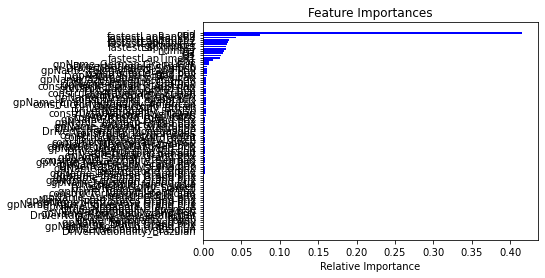

In [52]:
importances = model_rd.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_test.columns[i] for i in indices])
plt.xlabel('Relative Importance')

We can see from this graph that mst of the features like the nationality ones are note usefull at all.

In [53]:
[X_test.columns[i] for i in indices][-20:]

['DriverNationality_Mexican',
 'gpName_Eifel Grand Prix',
 'constructorId_red_bull',
 'gpName_Hungarian Grand Prix',
 'DriverNationality_Spanish',
 'DriverNationality_French',
 'gpName_German Grand Prix',
 'year',
 'fastestLapTimeP1',
 'Q1',
 'Q3',
 'Q2',
 'number',
 'fastestLapTimeP3',
 'gpNumber',
 'fastestLapRankP1',
 'fastestLapTimeP2',
 'fastestLapRankP3',
 'fastestLapRankP2',
 'grid']

In [54]:

model_lm = LinearRegression()
model_lm.fit(X_train, y_train)

y_pred = model_lm.predict(X_test)

In [55]:
error_lm = abs(y_pred - y_test)
error_calculation(error_lm)

Mean Absolute Error: 3.51
Mean Absolute Percentage Error : 54.58 %.
Accuracy : 9.0625 %.


## Not scaled data 

In [56]:
train, test = train_test_split(df_features, test_size=0.2)
X_train = train.drop(['position'], axis=1)
y_train = train['position']
X_test = test.drop(['position'], axis=1)
y_test = test['position']

In [57]:
random_forest = RandomForestRegressor() 
model_rd = random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test) 
error = abs(y_pred - y_test)
error_calculation(error)

Mean Absolute Error: 3.47
Mean Absolute Percentage Error : 61.44 %.
Accuracy : 9.0625 %.


In [59]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
error = abs(y_pred - y_test)
error_calculation(error)

Mean Absolute Error: 3.53
Mean Absolute Percentage Error : 60.85 %.
Accuracy : 11.5625 %.


In [60]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X_train, y_train).predict(X_test)
error = abs(y_pred - y_test)
error_calculation(error)

Mean Absolute Error: 3.96
Mean Absolute Percentage Error : 49.14 %.
Accuracy : 8.75 %.


In [61]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X_train, y_train).predict(X_test)
error = abs(y_pred - y_test)
error_calculation(error)

Mean Absolute Error: 5.11
Mean Absolute Percentage Error : 58.5 %.
Accuracy : 5.625 %.


C:\Users\benja\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [62]:
clf = MLPClassifier(solver='adam', alpha=0.0001,
 hidden_layer_sizes=(5, 2), random_state=1,verbose = True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
error = abs(y_pred - y_test)
error_calculation(error)

Iteration 1, loss = 33.72521004
Iteration 2, loss = 33.82192191
Iteration 3, loss = 22.65497061
Iteration 4, loss = 20.87544722
Iteration 5, loss = 20.02639240
Iteration 6, loss = 19.33307845
Iteration 7, loss = 7.83375119
Iteration 8, loss = 3.05063207
Iteration 9, loss = 3.05016484
Iteration 10, loss = 3.04968921
Iteration 11, loss = 3.04914491
Iteration 12, loss = 3.04865310
Iteration 13, loss = 3.04806502
Iteration 14, loss = 3.04753881
Iteration 15, loss = 3.04698736
Iteration 16, loss = 3.04644305
Iteration 17, loss = 3.04590919
Iteration 18, loss = 3.04537083
Iteration 19, loss = 3.04483565
Iteration 20, loss = 3.04429714
Iteration 21, loss = 3.04376057
Iteration 22, loss = 3.04324553
Iteration 23, loss = 3.04271404
Iteration 24, loss = 3.04219001
Iteration 25, loss = 3.04168374
Iteration 26, loss = 3.04122111
Iteration 27, loss = 3.04073934
Iteration 28, loss = 3.04024563
Iteration 29, loss = 3.03977688
Iteration 30, loss = 3.03934458
Iteration 31, loss = 3.03889951
Iteration 3

## Drop not usefull data

In [77]:
df_features2 =  pd.get_dummies(df_pred_postion, columns = ['constructorId'])


In [78]:
df_features2=df_features2.drop(['DriverNationality','constructorNationality','gpName'], axis=1)

In [79]:
df_features2.shape

(1599, 29)

## Finding the best algorythm

In [405]:
def test_train_creation(df):
    train, test = train_test_split(df, test_size=0.2)
    X_train = train.drop(['position'], axis=1)
    y_train = train['position']
    X_test = test.drop(['position'], axis=1)
    y_test = test['position']
    return X_train,y_train,X_test,y_test

In [406]:
X_train,y_train,X_test,y_test = test_train_creation(df_features2)

In [415]:
def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features) 
    error = abs(y_pred - test_labels)
    error_calculation(error)
    return y_pred

In [417]:
random_forest = RandomForestRegressor() 
model_rd = random_forest.fit(X_train, y_train)
y_pred = evaluate(random_forest, X_test, y_test)

Mean Absolute Error: 3.52
Mean Absolute Percentage Error : 59.71 %.
Accuracy : 9.375 %.


Text(0.5, 0, 'Relative Importance')

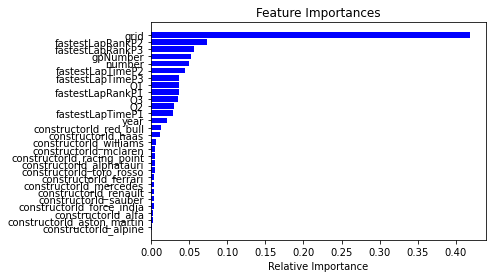

In [414]:
importances = model_rd.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_test.columns[i] for i in indices])
plt.xlabel('Relative Importance')

In [418]:

#model_svm = svm.SVC(kernel='linear',verbose = True) # Linear Kernel
#model_svm.fit(X_train, y_train)
#y_pred = model_svm.predict(X_test)
#error = abs(y_pred - y_test)
#error_calculation(error)

## The data is now trained considering the season and not the previous ones ( unless for the first GP)

In [373]:
def which_gp(gpNumber,year,df):
    if gpNumber != 1:
        idx = df[(df['gpNumber']==gpNumber) & (df['year']==year)].index[0]
        idx_begin = df[df['year']==year].index[0]
        idx_end = idx+20
        train = df.iloc[idx_begin:idx]
        test = df.iloc[idx:idx_end]
    else:
        idx = df[(df['gpNumber']==gpNumber) & (df['year']==year)].index[0]
        idx_begin = df[df['year']==(year-1)].index[0]
        idx_end = idx+20
        train = df.iloc[idx_begin:idx]
        test = df.iloc[idx:idx_end]
    return train,test

#### Test without the new data format

In [302]:
train, test = train_test_split(df_features2, test_size=0.2)
X_train = train.drop(['position'], axis=1)
y_train = train['position']
X_test = test.drop(['position'], axis=1)
y_test = test['position']


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=1)

model_rf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 
error = abs(y_pred - y_test)
error_calculation(error)


Mean Absolute Error: 3.55
Mean Absolute Percentage Error : 62.96 %.
Accuracy : 11.875 %.


#### test with the good data format

In [391]:
train, test = which_gp(2,2021,df_features2)
X_train = train.drop(['position'], axis=1)
y_train = train['position']
X_test = test.drop(['position'], axis=1)
y_test = test['position']


#clf = RandomForestClassifier(max_depth=3, random_state=1)
clf = RandomForestRegressor()
model_rf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 
error = abs(y_pred - y_test)
error_calculation(error)

Mean Absolute Error: 4.3
Mean Absolute Percentage Error : 102.8 %.
Accuracy : 0.0 %.


In [ ]:
#### We must have have,as a result, a ranking of every drivers.

In [396]:
def rank(y_pred):
    y_pred_1 =  y_pred.copy()
    y_pred.sort()
    for i in range(len(y_pred_1)):
        for j in range(len(y_pred)):
            if y_pred_1[i] == y_pred[j]:
                y_pred_1[i] = j+1
    return y_pred_1

In [397]:
y_pred = rank(y_pred)
error = abs(y_pred - y_test)
error_calculation(error)

Mean Absolute Error: 3.8
Mean Absolute Percentage Error : 71.88 %.
Accuracy : 10.0 %.


# Test Random Forest with GridSearch 

In [419]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [420]:
train, test = which_gp(15,2021,df_features2)
X_train = train.drop(['position'], axis=1)
y_train = train['position']
X_test = test.drop(['position'], axis=1)
y_test = test['position']

In [421]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [422]:
best_random = rf_random.best_estimator_
best_random

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=200)

In [423]:
y_pred = clf.predict(X_test) 
error = abs(y_pred - y_test)
error_calculation(error)

Mean Absolute Error: 5.2
Mean Absolute Percentage Error : 147.49 %.
Accuracy : 15.0 %.


In [424]:
y_pred = rank(y_pred)
error = abs(y_pred - y_test)
error_calculation(error)

Mean Absolute Error: 4.2
Mean Absolute Percentage Error : 54.45 %.
Accuracy : 10.0 %.


In [425]:
y_pred

array([ 1.,  3.,  5., 18.,  2., 11.,  6., 13., 14., 12., 17.,  8.,  4.,
        7.,  9., 10., 16., 20., 19., 15.])

In [431]:
X_test.iloc[6]

number                                4.0
grid                                  1.0
year                               2021.0
gpNumber                             15.0
Q1                             60047238.0
Q2                             60045827.0
Q3                             60041993.0
fastestLapRankP1                      8.0
fastestLapTimeP1               60035959.0
fastestLapRankP2                      4.0
fastestLapTimeP2               60034154.0
fastestLapRankP3                     21.0
fastestLapTimeP3              120004382.0
constructorId_alfa                    0.0
constructorId_alphatauri              0.0
constructorId_alpine                  0.0
constructorId_aston_martin            0.0
constructorId_ferrari                 0.0
constructorId_force_india             0.0
constructorId_haas                    0.0
constructorId_mclaren                 1.0
constructorId_mercedes                0.0
constructorId_racing_point            0.0
constructorId_red_bull            